# *El problema de n-círculos*

Dado un conjunto *C* de *n* círculos y un conjunto *P* de *m* puntos, encontrar todos los círculos en *C* que están vacíos.

## Preliminares

### Ejemplo Gráfico

In [12]:
circles = [
    ((3.5, 11.5), 1.5),
    ((6.5, 8.5),  1.5),
    ((5.0, 10.0), 1.0),
]
points = [(4.3, 10.5), (7.5, 4.5)]

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from typing import List, Tuple, Optional, Dict, Any

Coord = Tuple[float, float]
CircleSpec = Tuple[Coord, float]

def plot_circles_points(
    circles: Optional[List[CircleSpec]] = None,
    points: Optional[List[Coord]] = None,
    *,
    annotations: Optional[List[Dict[str, Any]]] = None,
    # vertical line options
    show_vline: bool = False,
    vline_x: float = 1.0,
    vline_kwargs: Optional[dict] = None,
    # styling
    circle_kwargs: Optional[dict] = None,
    point_kwargs: Optional[dict] = None,
    title: Optional[str] = "Circles and Points",
    ax: Optional[plt.Axes] = None,
    show: bool = True,
    marker ="."
):
    """
    Plot circles/points, with fully generic labels.

    circles: list of ((cx, cy), r)
    points:  list of (x, y)

    annotations: list of dicts. Each dict can be:
      {
        "anchor": "circle" | "point" | "xy",   # default: "xy"
        "index": int,                          # required when anchor is "circle"/"point" (0-based)
        "xy": (x, y),                          # required when anchor is "xy"
        "text": "Your label text",             # required
        "pos": (x, y),                         # optional: where to place the text (if omitted, placed at anchor)
        "arrow": bool,                         # optional: if True and pos given, draw arrow from anchor -> pos
        "style": {...},                        # optional: passed to text/annotate (e.g., ha, va, fontsize)
        "arrowprops": {...}                    # optional: passed to annotate for arrow styling
      }

    Notes:
      - Labels are independent from the number of circles/points.
      - If 'pos' is supplied and 'arrow' is True, we use ax.annotate with an arrow.
      - If 'pos' is supplied and 'arrow' is False, we place text at 'pos' with no arrow.
      - If 'pos' is omitted, we place text at the anchor point.
    """
    circles = circles or []
    points = points or []
    annotations = annotations or []

    circle_kwargs = circle_kwargs or {"fill": False, "linewidth": 2}
    point_kwargs = point_kwargs or {"s": 60, "zorder": 3, "marker": marker,}
    vline_kwargs = vline_kwargs or {"linestyle": "--", "linewidth": 1, "alpha": 0.8}

    created_fig = None
    if ax is None:
        created_fig, ax = plt.subplots(figsize=(15, 15))

    # --- Draw circles ---
    for ((cx, cy), r) in circles:
        ax.add_patch(Circle((cx, cy), r, **circle_kwargs))

    # --- Draw points ---
    if points:
        xs, ys = zip(*points)
        ax.scatter(xs, ys, **point_kwargs)

    # --- Draw optional vertical line ---
    if show_vline:
        ax.axvline(vline_x, **vline_kwargs)

    # --- Annotations (generic) ---
    def _anchor_xy(a: Dict[str, Any]) -> Optional[Coord]:
        anchor = a.get("anchor", "xy")
        if anchor == "circle":
            i = a.get("index")
            if i is None or i < 0 or i >= len(circles):
                return None
            return circles[i][0]
        elif anchor == "point":
            i = a.get("index")
            if i is None or i < 0 or i >= len(points):
                return None
            return points[i]
        else:  # "xy"
            return a.get("xy")

    for a in annotations:
        text = a.get("text", "")
        if not text:
            continue
        anc = _anchor_xy(a)
        if anc is None:
            continue  # skip malformed annotation

        pos = a.get("pos")  # where to place text; if None, at anchor
        style = a.get("style", {})
        arrow = a.get("arrow", (pos is not None))  # default: arrow if pos given
        arrowprops = a.get("arrowprops", {"arrowstyle": "->", "lw": 1})

        if pos is None:
            # place text at the anchor
            default_style = {"ha": "center", "va": "center"}
            default_style.update(style)
            ax.text(anc[0], anc[1], str(text), **default_style)
        else:
            if arrow:
                default_style = {"ha": "left", "va": "bottom"}
                default_style.update(style)
                ax.annotate(str(text), xy=anc, xytext=pos, arrowprops=arrowprops, **default_style)
            else:
                default_style = {"ha": "left", "va": "bottom"}
                default_style.update(style)
                ax.text(pos[0], pos[1], str(text), **default_style)

    # --- Bounds (include circles, points, and any annotation positions) ---
    xs, ys = [], []
    for (cx, cy), r in circles:
        xs.extend([cx - r, cx + r]); ys.extend([cy - r, cy + r])
    for (px, py) in points:
        xs.append(px); ys.append(py)
    for a in annotations:
        if "pos" in a and isinstance(a["pos"], (tuple, list)):
            xs.append(a["pos"][0]); ys.append(a["pos"][1])
        if a.get("anchor", "xy") == "xy" and "xy" in a and isinstance(a["xy"], (tuple, list)):
            xs.append(a["xy"][0]); ys.append(a["xy"][1])

    if xs and ys:
        pad = 0.5
        ax.set_xlim(min(xs) - pad, max(xs) + pad)
        ax.set_ylim(min(ys) - pad, max(ys) + pad)

    ax.set_aspect("equal", adjustable="box")
    ax.grid(True)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    if title:
        ax.set_title(title)

    if show and created_fig is not None:
        plt.show()

    return created_fig, ax


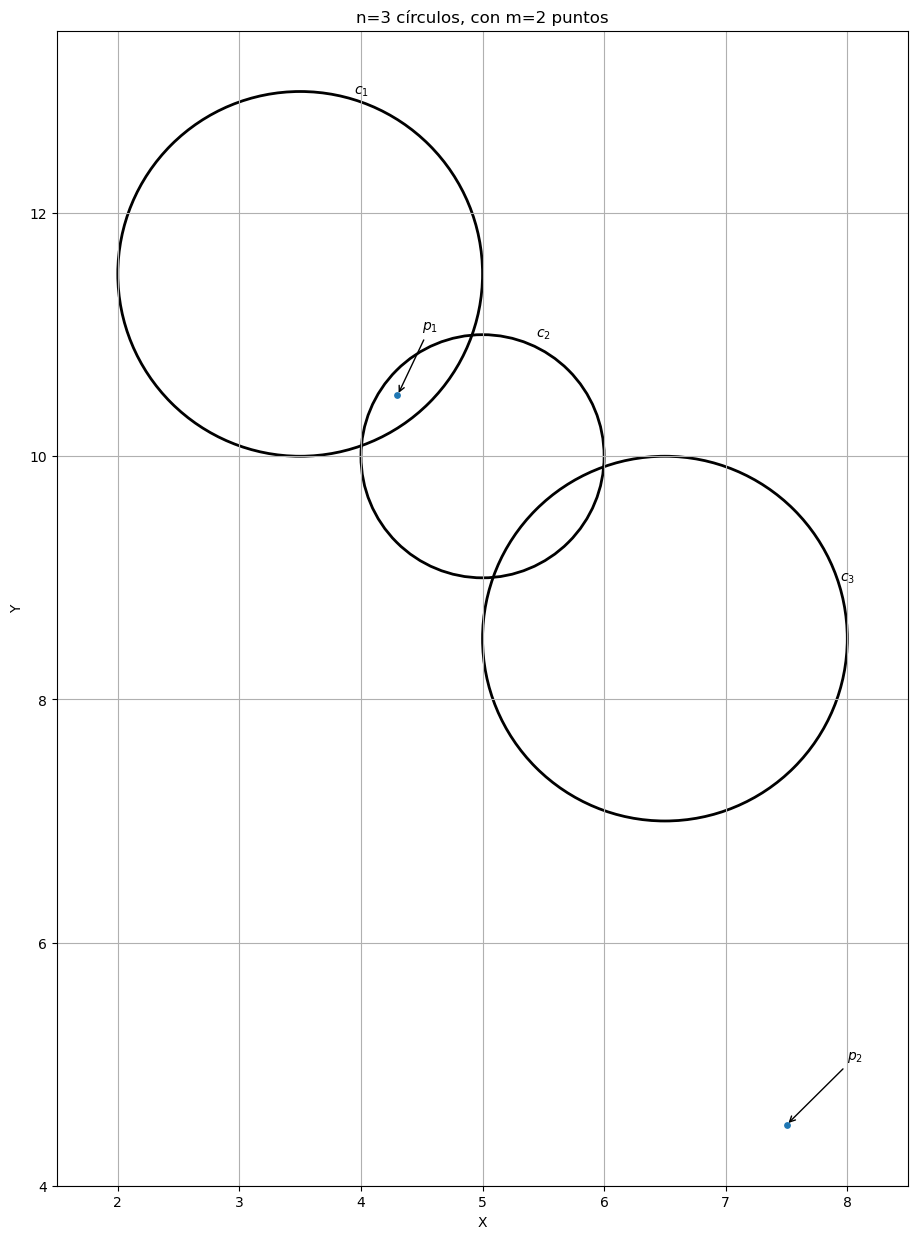

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': 'n=3 círculos, con m=2 puntos'}, xlabel='X', ylabel='Y'>)

In [29]:
annotations = [
    # {"anchor": "circle", "index": 9, "text": "Main cluster"},            # at circle center
    # # {"anchor": "point",  "index": 1, "text": "Depot", "pos": (8.2, 17.8)},# offset with arrow
    {"anchor": "xy", "xy": (4, 13), "text": "$c_1$"},             # arbitrary location
    {"anchor": "xy", "xy": (5.5, 11), "text": "$c_2$"},             # arbitrary location
    {"anchor": "xy", "xy": (8, 9), "text": "$c_3$"},             # arbitrary location
    # {"anchor": "xy", "xy": (4, 26.5), "text": "$c_4$"},             # arbitrary location
    # {"anchor": "xy", "xy": (0.3, 19.5), "text": "$c_5$"},             # arbitrary location
    # {"anchor": "xy", "xy": (8, 21.7), "text": "$c_6$"},             # arbitrary location
    # {"anchor": "xy", "xy": (12.5, 20.5), "text": "$c_7$"},             # arbitrary location
    # {"anchor": "xy", "xy": (23, 19), "text": "$c_8$"},             # arbitrary location
    # {"anchor": "xy", "xy": (27, 22.5), "text": "$c_9$"},             # arbitrary location
    # {"anchor": "xy", "xy": (27.3, 15), "text": "$c_{10}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (0.5, 11), "text": "$c_{11}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (12, 11.5), "text": "$c_{12}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (16, 12.5), "text": "$c_{13}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (3, 6), "text": "$c_{14}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (9.5, 6), "text": "$c_{15}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (23, 7), "text": "$c_{16}$"},             # arbitrary location

    {"anchor": "point",  "index": 1, "text": "$p_2$", "pos": (8, 5)},# offset with arrow
    # {"anchor": "point",  "index": 2, "text": "$p_5$", "pos": (24, 8)},# offset with arrow
    # {"anchor": "point",  "index": 3, "text": "$p_3$", "pos": (23, 21)},# offset with arrow
    # {"anchor": "point",  "index": 4, "text": "$p_6$", "pos": (11, 3)},# offset with arrow
    # {"anchor": "point",  "index": 5, "text": "$p_1$", "pos": (15, 31)},# offset with arrow
    {"anchor": "point",  "index": 0, "text": "$p_1$", "pos": (4.5, 11)},# offset with arrow
    # {"anchor": "circle", "index": 3, "text": "North hub","pos": (3.6, 18.6), "arrow": True, "style": {"fontsize": 9}}
]

plot_circles_points(
    circles=circles,
    points=points,
    annotations=annotations,
    show_vline=False,   # optional vertical line
    vline_x=1,
    title="n=3 círculos, con m=2 puntos"
)


# Paso 0: Inicializar $Q$ y $A_c$

Para la figura:

$C =\{c_1, c_2, c_3\}$

$P =\{p_1, p_2\}$

Por tanto

$Q = (\text{Puntos izquierdos}\cup\text{Puntos de entrada})_{ordenados}$

$Q = (\{ (2, 11.5, \text{ left-end-point}, c_1), (5, 8.5, \text{ left-end-point}, c_2), (4, 10.0, \text{ left-end-point}, c_3)\}\cup\{(4.3, 10.5, \text{ input-point}, p_1),(7.5, 4.5, \text{ input-point}, p_2)\})_{ordenados}$

$Q = (\{ (2, 11.5, \text{ left-end-point}, c_1), (5, 8.5, \text{ left-end-point}, c_2), (4, 10.0, \text{ left-end-point}, c_3), (4.3, 10.5, \text{ input-point}, p_1),(7.5, 4.5, \text{ input-point}, p_2) \})_{ordenados}$

$Q = (\{ (2, 11.5, \text{ left-end-point}, c_1), (4, 10.0, \text{ left-end-point}, c_3), (4.3, 10.5, \text{ input-point}, p_1), (5, 8.5, \text{ left-end-point}, c_2), (7.5, 4.5, \text{ input-point}, p_2)\})$

y

$A_c = C = \{c_1, c_2, c_3\}$

$\mathcal{L}=\emptyset$ 

# Paso 1: x=2, left-end-point

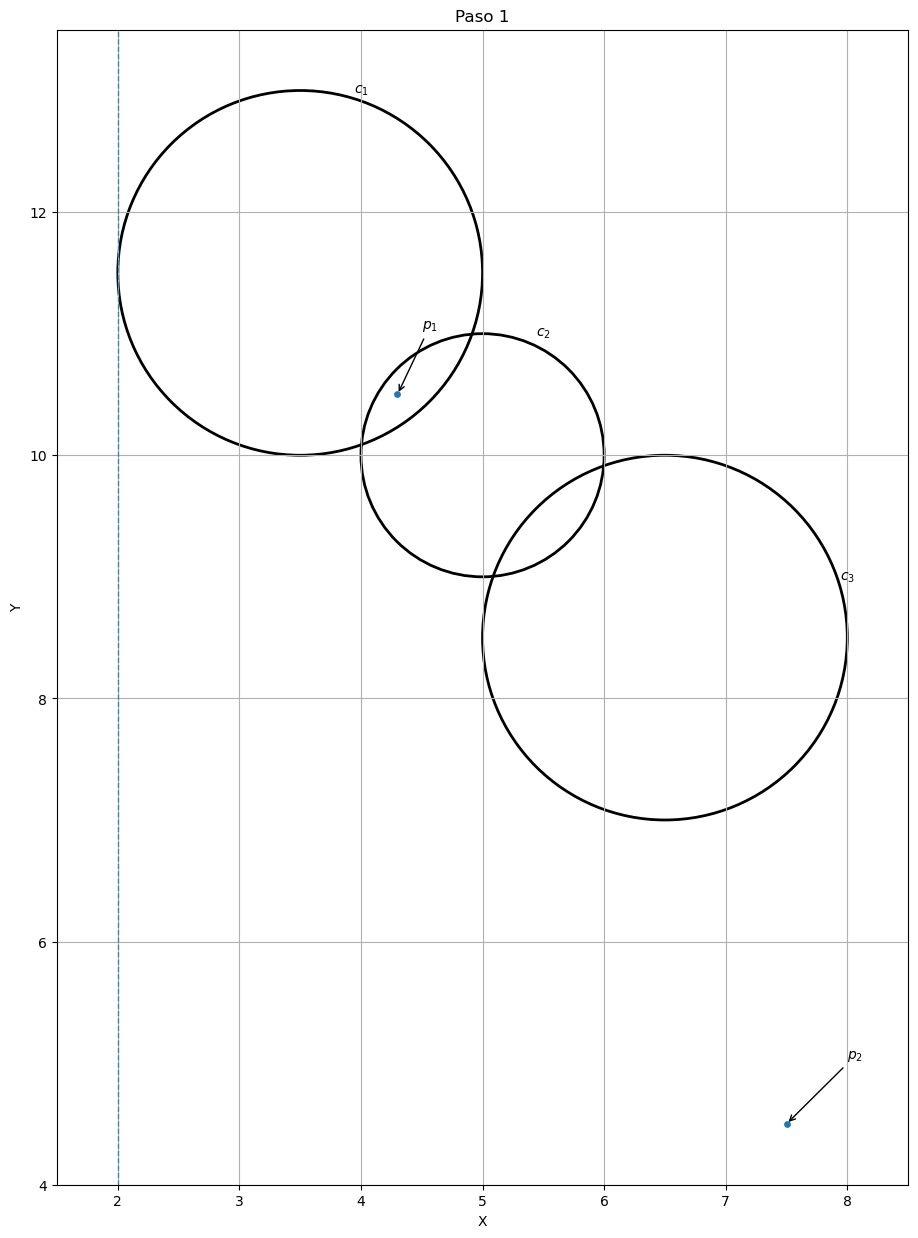

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': 'Paso 1'}, xlabel='X', ylabel='Y'>)

In [30]:
annotations = [
    # {"anchor": "circle", "index": 9, "text": "Main cluster"},            # at circle center
    # # {"anchor": "point",  "index": 1, "text": "Depot", "pos": (8.2, 17.8)},# offset with arrow
    {"anchor": "xy", "xy": (4, 13), "text": "$c_1$"},             # arbitrary location
    {"anchor": "xy", "xy": (5.5, 11), "text": "$c_2$"},             # arbitrary location
    {"anchor": "xy", "xy": (8, 9), "text": "$c_3$"},             # arbitrary location
    # {"anchor": "xy", "xy": (4, 26.5), "text": "$c_4$"},             # arbitrary location
    # {"anchor": "xy", "xy": (0.3, 19.5), "text": "$c_5$"},             # arbitrary location
    # {"anchor": "xy", "xy": (8, 21.7), "text": "$c_6$"},             # arbitrary location
    # {"anchor": "xy", "xy": (12.5, 20.5), "text": "$c_7$"},             # arbitrary location
    # {"anchor": "xy", "xy": (23, 19), "text": "$c_8$"},             # arbitrary location
    # {"anchor": "xy", "xy": (27, 22.5), "text": "$c_9$"},             # arbitrary location
    # {"anchor": "xy", "xy": (27.3, 15), "text": "$c_{10}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (0.5, 11), "text": "$c_{11}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (12, 11.5), "text": "$c_{12}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (16, 12.5), "text": "$c_{13}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (3, 6), "text": "$c_{14}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (9.5, 6), "text": "$c_{15}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (23, 7), "text": "$c_{16}$"},             # arbitrary location

    {"anchor": "point",  "index": 1, "text": "$p_2$", "pos": (8, 5)},# offset with arrow
    # {"anchor": "point",  "index": 2, "text": "$p_5$", "pos": (24, 8)},# offset with arrow
    # {"anchor": "point",  "index": 3, "text": "$p_3$", "pos": (23, 21)},# offset with arrow
    # {"anchor": "point",  "index": 4, "text": "$p_6$", "pos": (11, 3)},# offset with arrow
    # {"anchor": "point",  "index": 5, "text": "$p_1$", "pos": (15, 31)},# offset with arrow
    {"anchor": "point",  "index": 0, "text": "$p_1$", "pos": (4.5, 11)},# offset with arrow
    # {"anchor": "circle", "index": 3, "text": "North hub","pos": (3.6, 18.6), "arrow": True, "style": {"fontsize": 9}}
]

plot_circles_points(
    circles=circles,
    points=points,
    annotations=annotations,
    show_vline=True,   # optional vertical line
    vline_x=2,
    title="Paso 1"
)


**Algoritmo de punto tangente izquierdo**
* Sea $e \in Q$ el punto izquierdo del círculo $c \in A_C$
    * $e=(2, 11.5)$
* Incertamos en Q el punto del círculo $c$ tangente a $\mathcal{L}$ del lado derecho
    * $Q=Q\cup\{(5, 11.5, \text{ right-end-point}, c_1)\}$
    * $Q = (\{ (2, 11.5, \text{ left-end-point}, c_1), (4, 10.0, \text{ left-end-point}, c_3), (4.3, 10.5, \text{ input-point}, p_1), (5, 8.5, \text{ left-end-point}, c_2), (5, 11.5, \text{ right-end-point}, c_1), (7.5, 4.5, \text{ input-point}, p_2)\})$
* $r =$ la región en $\mathcal{L}$ que contiene a $e$
    * $\mathcal{L}=\emptyset \cup c_1$ 
* $r_{i}=$ la región arriba de $c$ de $r$
    * $r_{i}=\emptyset$
* $r_{ii}=$ la región en $c$ de $r$
    * $r_{ii}=c_1$
* $r_{iii}=$ la región debajo de $c$ de $r$
    * $r_{iii}=\emptyset$
* Quitar $r$ de $\mathcal{L}$.
    * 
* Insertar $r_1$, $r_2$, $r_3$ en $\mathcal{L}$
    * $\mathcal{L}\cup{\emptyset, c_1, \emptyset}$
* $C_{r_i} = C_{r_{iii}} = C_r$
    * $\emptyset$
* $C_{r_{ii}} = C_r \cup \{c\}$
    * $c_1$
* Si $c$ intersecta el arco circular que limita por arriba a $r_1$, entonces inserta este punto de intersección en $Q$
    * No aplica
* Si $c$ intersecta el arco circular que limita por abajo a $r_3$, entonces inserta este punto de intersección en $Q$|
    * No aplica



In [ ]:
circles = [
    ((3.5, 11.5), 1.5),
    ((6.5, 8.5),  1.5),
    ((5.0, 10.0), 1.0),
]
points = [(4.3, 10.5), (7.5, 4.5)]

## Observación 2.1
Un arreglo de *n* círculos divide al plano en un conjunto de regiones *R*, con máximo $O(n^2)$ regiones.


Para nuestro ejemplo $n=16$, por lo tanto $n^2=256$

Y hay 35 regiones

In [5]:
16**2

256

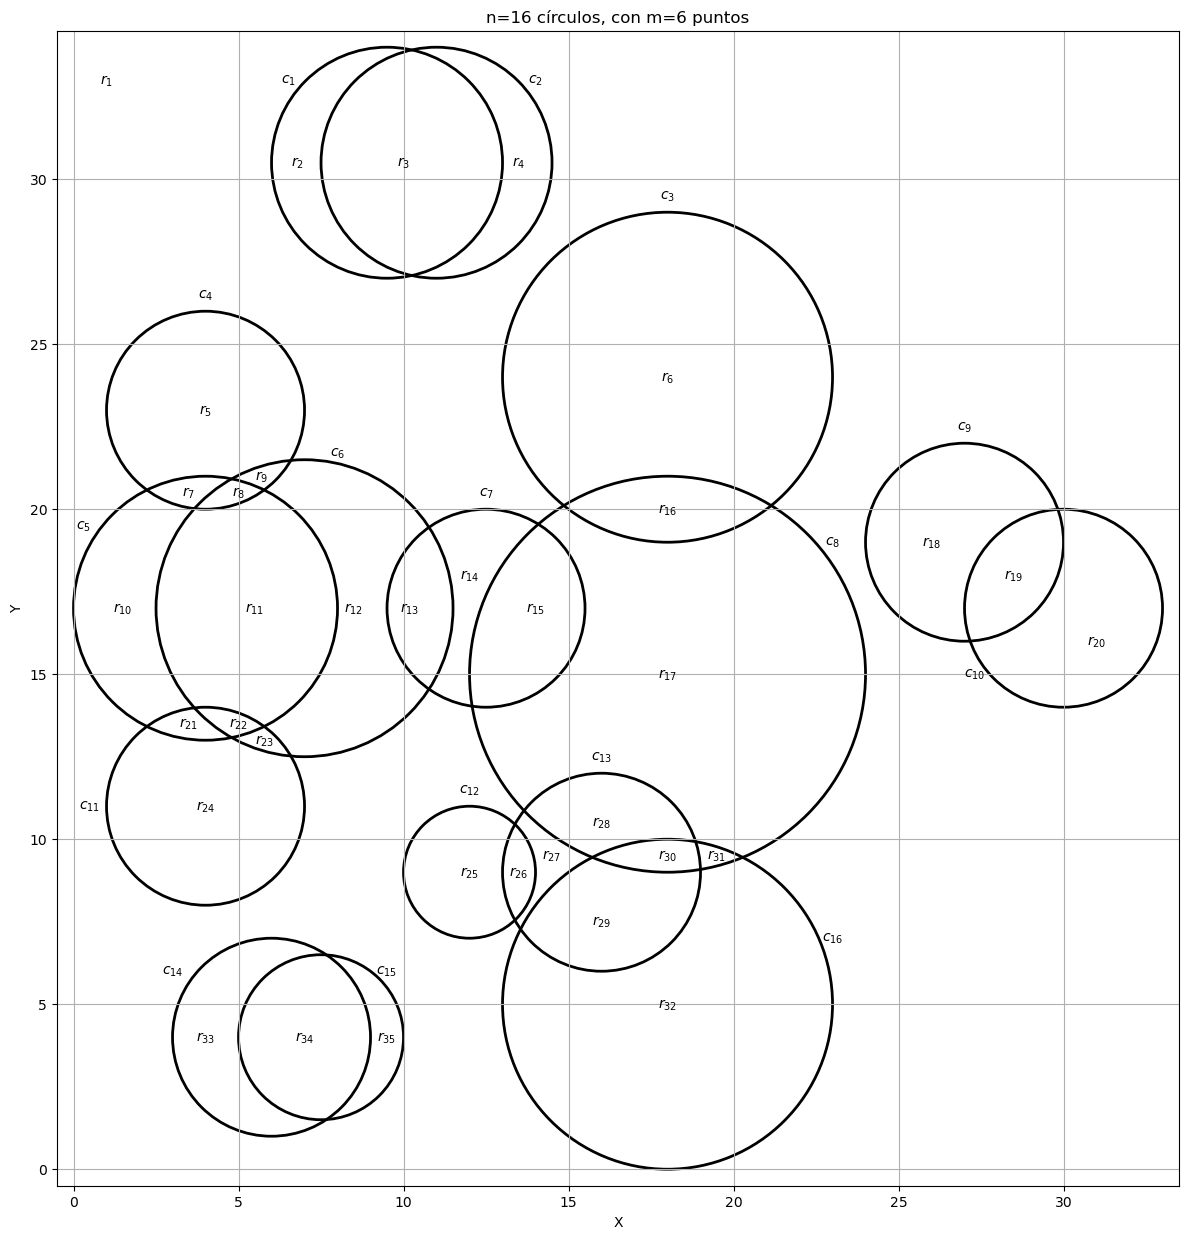

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': 'n=16 círculos, con m=6 puntos'}, xlabel='X', ylabel='Y'>)

In [6]:
annotations = [
    # {"anchor": "circle", "index": 9, "text": "Main cluster"},            # at circle center
    # {"anchor": "point",  "index": 1, "text": "Depot", "pos": (8.2, 17.8)},# offset with arrow
    {"anchor": "xy", "xy": (1, 33), "text": "$r_1$"},             # arbitrary location
    {"anchor": "xy", "xy": (6.8, 30.5), "text": "$r_2$"},             # arbitrary location
    {"anchor": "xy", "xy": (10, 30.5), "text": "$r_3$"},             # arbitrary location
    {"anchor": "xy", "xy": (13.5, 30.5), "text": "$r_4$"},             # arbitrary location
    {"anchor": "xy", "xy": (4, 23), "text": "$r_5$"},             # arbitrary location
    {"anchor": "xy", "xy": (18, 24), "text": "$r_6$"},             # arbitrary location
    {"anchor": "xy", "xy": (3.5, 20.5), "text": "$r_7$"},             # arbitrary location
    {"anchor": "xy", "xy": (5., 20.5), "text": "$r_8$"},             # arbitrary location
    {"anchor": "xy", "xy": (5.7, 21), "text": "$r_9$"},             # arbitrary location
    {"anchor": "xy", "xy": (1.5, 17), "text": "$r_{10}$"},             # arbitrary location
    {"anchor": "xy", "xy": (5.5, 17), "text": "$r_{11}$"},             # arbitrary location
    {"anchor": "xy", "xy": (8.5, 17), "text": "$r_{12}$"},             # arbitrary location
    {"anchor": "xy", "xy": (10.2, 17), "text": "$r_{13}$"},             # arbitrary location
    {"anchor": "xy", "xy": (12, 18), "text": "$r_{14}$"},             # arbitrary location
    {"anchor": "xy", "xy": (14, 17), "text": "$r_{15}$"},             # arbitrary location
    {"anchor": "xy", "xy": (18, 20), "text": "$r_{16}$"},             # arbitrary location
    {"anchor": "xy", "xy": (18, 15), "text": "$r_{17}$"},             # arbitrary location
    {"anchor": "xy", "xy": (26, 19), "text": "$r_{18}$"},             # arbitrary location
    {"anchor": "xy", "xy": (28.5, 18), "text": "$r_{19}$"},             # arbitrary location
    {"anchor": "xy", "xy": (31, 16), "text": "$r_{20}$"},             # arbitrary location
    {"anchor": "xy", "xy": (3.5, 13.5), "text": "$r_{21}$"},             # arbitrary location
    {"anchor": "xy", "xy": (5, 13.5), "text": "$r_{22}$"},             # arbitrary location
    {"anchor": "xy", "xy": (5.8, 13), "text": "$r_{23}$"},             # arbitrary location
    {"anchor": "xy", "xy": (4, 11), "text": "$r_{24}$"},             # arbitrary location
    {"anchor": "xy", "xy": (12, 9), "text": "$r_{25}$"},             # arbitrary location
    {"anchor": "xy", "xy": (13.5, 9), "text": "$r_{26}$"},             # arbitrary location
    {"anchor": "xy", "xy": (14.5, 9.5), "text": "$r_{27}$"},             # arbitrary location
    {"anchor": "xy", "xy": (16, 10.5), "text": "$r_{28}$"},             # arbitrary location
    {"anchor": "xy", "xy": (16, 7.5), "text": "$r_{29}$"},             # arbitrary location
    {"anchor": "xy", "xy": (18, 9.5), "text": "$r_{30}$"},             # arbitrary location
    {"anchor": "xy", "xy": (19.5, 9.5), "text": "$r_{31}$"},             # arbitrary location
    {"anchor": "xy", "xy": (18, 5), "text": "$r_{32}$"},             # arbitrary location
    {"anchor": "xy", "xy": (4, 4), "text": "$r_{33}$"},             # arbitrary location
    {"anchor": "xy", "xy": (7, 4), "text": "$r_{34}$"},             # arbitrary location
    {"anchor": "xy", "xy": (9.5, 4), "text": "$r_{35}$"},             # arbitrary location

    {"anchor": "xy", "xy": (6.5, 33), "text": "$c_1$"},             # arbitrary location
    {"anchor": "xy", "xy": (14, 33), "text": "$c_2$"},             # arbitrary location
    {"anchor": "xy", "xy": (18, 29.5), "text": "$c_3$"},             # arbitrary location
    {"anchor": "xy", "xy": (4, 26.5), "text": "$c_4$"},             # arbitrary location
    {"anchor": "xy", "xy": (0.3, 19.5), "text": "$c_5$"},             # arbitrary location
    {"anchor": "xy", "xy": (8, 21.7), "text": "$c_6$"},             # arbitrary location
    {"anchor": "xy", "xy": (12.5, 20.5), "text": "$c_7$"},             # arbitrary location
    {"anchor": "xy", "xy": (23, 19), "text": "$c_8$"},             # arbitrary location
    {"anchor": "xy", "xy": (27, 22.5), "text": "$c_9$"},             # arbitrary location
    {"anchor": "xy", "xy": (27.3, 15), "text": "$c_{10}$"},             # arbitrary location
    {"anchor": "xy", "xy": (0.5, 11), "text": "$c_{11}$"},             # arbitrary location
    {"anchor": "xy", "xy": (12, 11.5), "text": "$c_{12}$"},             # arbitrary location
    {"anchor": "xy", "xy": (16, 12.5), "text": "$c_{13}$"},             # arbitrary location
    {"anchor": "xy", "xy": (3, 6), "text": "$c_{14}$"},             # arbitrary location
    {"anchor": "xy", "xy": (9.5, 6), "text": "$c_{15}$"},             # arbitrary location
    {"anchor": "xy", "xy": (23, 7), "text": "$c_{16}$"},             # arbitrary location


    # {"anchor": "point",  "index": 1, "text": "$p_2$", "pos": (9, 21)},# offset with arrow
    # {"anchor": "point",  "index": 2, "text": "$p_5$", "pos": (24, 8)},# offset with arrow
    # {"anchor": "point",  "index": 3, "text": "$p_3$", "pos": (23, 21)},# offset with arrow
    # {"anchor": "point",  "index": 4, "text": "$p_6$", "pos": (11, 3)},# offset with arrow
    # {"anchor": "point",  "index": 5, "text": "$p_1$", "pos": (15, 31)},# offset with arrow
    # {"anchor": "point",  "index": 0, "text": "$p_4$", "pos": (32, 21)},# offset with arrow
    # {"anchor": "circle", "index": 3, "text": "North hub","pos": (3.6, 18.6), "arrow": True, "style": {"fontsize": 9}}
]

plot_circles_points(
    circles=circles,
    # points=points,
    annotations=annotations,
    show_vline=False,   # optional vertical line
    vline_x=1,
    title="n=16 círculos, con m=6 puntos"
)

Con esta dos figuras podemos obtener $C_r$ para cada región

Para cada región $r$ llamamos $C_r$ al conjunto de círculos activos que contienen esa región.

| Región | Círculos con esa región          |
|:------:|:--------------------------------:|
| 1      | $\emptyset$                      |
| 2      | $C_r = \{ c_1 \}$                |
| 3      | $C_r = \{ c_1, c_2 \}$           |
| 4      | $C_r = \{ c_2 \}$                |
| 5      | $C_r = \{ c_4 \}$                |
| 6      | $C_r = \{ c_3 \}$                |
| 7      | $C_r = \{ c_4, c_5 \}$           |
| 8      | $C_r = \{ c_4, c_5, c_6 \}$      |
| 9      | $C_r = \{ c_4, c_6 \}$           |
| 10     | $C_r = \{ c_5 \}$                |
| 11     | $C_r = \{ c_5, c_6 \}$           |
| 12     | $C_r = \{ c_6 \}$                |
| 13     | $C_r = \{ c_6, c_7 \}$           |
| 14     | $C_r = \{ c_7 \}$                |
| 15     | $C_r = \{ c_7, c_8 \}$           |
| 16     | $C_r = \{ c_3, c_8 \}$           |
| 17     | $C_r = \{ c_8 \}$                |
| 18     | $C_r = \{ c_9 \}$                |
| 19     | $C_r = \{ c_9, c_{10} \}$        |
| 20     | $C_r = \{ c_{10} \}$             |
| 21     | $C_r = \{ c_5, c_{11} \}$        |
| 22     | $C_r = \{ c_5, c_6, c_{11} \}$   |
| 23     | $C_r = \{ c_6, c_{11} \}$        |
| 24     | $C_r = \{ c_{11} \}$             |
| 25     | $C_r = \{ c_{12} \}$             |
| 26     | $C_r = \{ c_{12}, c_{13} \}$     |
| 27     | $C_r = \{ c_{13} \}$             |
| 28     | $C_r = \{ c_{8}, c_{13} \}$      |
| 29     | $C_r = \{ c_{13}, c_{16} \}$     |
| 30     | $C_r = \{ c_8, c_{13}, c_{16} \}$|
| 31     | $C_r = \{ c_8, c_{16} \}$        |
| 32     | $C_r = \{ c_{16} \}$             |
| 33     | $C_r = \{ c_{14} \}$             |
| 34     | $C_r = \{ c_{14}, c_{15} \}$     |
| 35     | $C_r = \{ c_{15} \}$             |


### Observación 2.2

Si un círculo no está vacío, entonces es suficiente con encontrar un *testigo* (esto es, un punto dentro del círculo) para eliminarlo de la lista de círculos vacíos ("podarlo")

### Observación 2.3
Si un punto está en la región $r \in R$, entonces todos los círculos que contienen esta región no están vacíos, y pueden ser "podados".

## Algoritmo

### Definiciones

**Relación de orden parcial**

Para cada posición de la línea de barrido, definimos una **relación de orden parcial** $<_a$, en el conjunto de regiones $R$ de la siguiente forma:
Para dos regiones $r_i$ y $r_j$ en $R$, se dice que $r_i <_a r_j$ si la intersección de la región $r_i$ con la línea vertical $x=a$ cae debajo de la intersección de la región $r_j$ con la misma línea.

Este órden de información se mantiene en el *Estado de la Línea de barrido* denominado $\mathcal{L}$

**Punto de evento**

Un **punto de evento** puede ser el punto de interseción de dos círculos, o el punto más a la izquierda o más a la derecha de un círculo, o un punto de entrada.

**Orden de prioridad**

Los eventos se mantienen en una lista de prioridad $Q$, que al inicio del algoritmo contiene los puntos de entrada y los puntos más a la izquierda de cada círculo.

**Círculo activo**

A un círculo $C$ se le dice que está "activo" si está vacío o aún no se ha encontrado ningún testigo en él.

Al conjunto de círculos activos lo denotamos con $A_c$.

Inicialmente $A_c = C$

# Ejemplo paso a paso

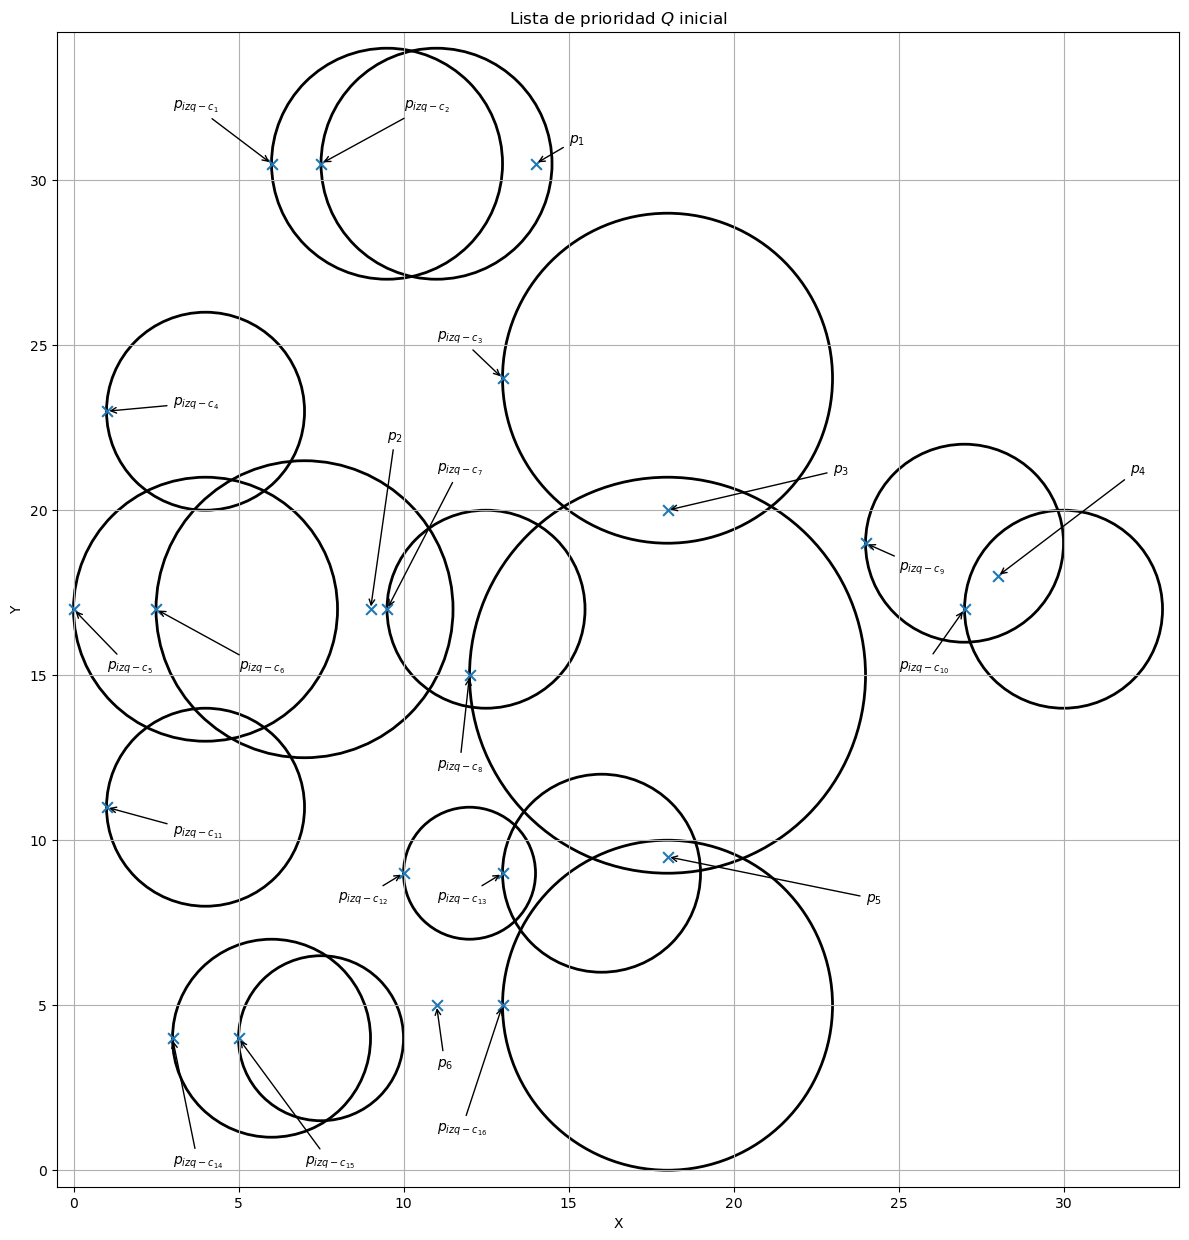

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': 'Lista de prioridad $Q$ inicial'}, xlabel='X', ylabel='Y'>)

In [7]:
# circles = [
#     ((7.5, 4), 2.5),
#     ((6, 4),  3),
#     ((4, 11), 3),
#     ((4, 17), 4),
#     ((4, 23), 3),
#     ((7, 17), 4.5),
#     ((9.5, 30.5), 3.5),
#     ((11, 30.5), 3.5),
#     ((18, 5), 5),
#     ((18, 15), 6),
#     ((18, 24), 5),
#     ((12, 9), 2),
#     ((12.5,17), 3),
#     ((16,9),3),
#     ((27,19),3),
#     ((30,17),3)
# ]

points = [
    (28, 18),           # p4
    (9, 17),            # p2
    (18, 9.5),          # p5
    (18, 20),           # p3
    (11, 5),            # p6
    (14, 30.5),         # p1
    (7.5-2.5, 4),       # p c15
    (6-3, 4),           # p c14
    (4-3, 11),          # p c11
    (4-4, 17),          # p c5
    (4-3, 23),          # p c4
    (7-4.5, 17),        # p c6
    (9.5-3.5, 30.5),    # p c1
    (11-3.5, 30.5),     # p c2
    (18-5, 5),          # p c16
    (18-6, 15),         # p c8
    (18-5, 24),         # p c3
    (12-2, 9),          # p c12
    (12.5-3,17),        # p c7
    (16-3,9),           # p c13
    (27-3,19),          # p c9
    (30-3,17),          # p c10
]

annotations = [
    # {"anchor": "circle", "index": 9, "text": "Main cluster"},            # at circle center
    # {"anchor": "point",  "index": 1, "text": "Depot", "pos": (8.2, 17.8)},# offset with arrow
    # {"anchor": "xy", "xy": (6.5, 33), "text": "$c_1$"},             # arbitrary location
    # {"anchor": "xy", "xy": (14, 33), "text": "$c_2$"},             # arbitrary location
    # {"anchor": "xy", "xy": (18, 29.5), "text": "$c_3$"},             # arbitrary location
    # {"anchor": "xy", "xy": (4, 26.5), "text": "$c_4$"},             # arbitrary location
    # {"anchor": "xy", "xy": (0.3, 19.5), "text": "$c_5$"},             # arbitrary location
    # {"anchor": "xy", "xy": (8, 21.7), "text": "$c_6$"},             # arbitrary location
    # {"anchor": "xy", "xy": (12.5, 20.5), "text": "$c_7$"},             # arbitrary location
    # {"anchor": "xy", "xy": (23, 19), "text": "$c_8$"},             # arbitrary location
    # {"anchor": "xy", "xy": (27, 22.5), "text": "$c_9$"},             # arbitrary location
    # {"anchor": "xy", "xy": (27.3, 15), "text": "$c_{10}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (0.5, 11), "text": "$c_{11}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (12, 11.5), "text": "$c_{12}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (16, 12.5), "text": "$c_{13}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (3, 6), "text": "$c_{14}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (9.5, 6), "text": "$c_{15}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (23, 7), "text": "$c_{16}$"},             # arbitrary location

    {"anchor": "point",  "index": 1, "text": "$p_2$", "pos": (9.5, 22)},# offset with arrow
    {"anchor": "point",  "index": 2, "text": "$p_5$", "pos": (24, 8)},# offset with arrow
    {"anchor": "point",  "index": 3, "text": "$p_3$", "pos": (23, 21)},# offset with arrow
    {"anchor": "point",  "index": 4, "text": "$p_6$", "pos": (11, 3)},# offset with arrow
    {"anchor": "point",  "index": 5, "text": "$p_1$", "pos": (15, 31)},# offset with arrow
    {"anchor": "point",  "index": 0, "text": "$p_4$", "pos": (32, 21)},# offset with arrow
    {"anchor": "point",  "index": 6, "text": "$p_{izq-c_{15}}$", "pos": (7, 0)},# offset with arrow
    {"anchor": "point",  "index": 7, "text": "$p_{izq-c_{14}}$", "pos": (3, 0)},# offset with arrow
    {"anchor": "point",  "index": 8, "text": "$p_{izq-c_{11}}$", "pos": (3, 10)},# offset with arrow
    {"anchor": "point",  "index": 9, "text": "$p_{izq-c_{5}}$", "pos": (1, 15)},# offset with arrow
    {"anchor": "point",  "index": 10, "text": "$p_{izq-c_{4}}$", "pos": (3, 23)},# offset with arrow
    {"anchor": "point",  "index": 11, "text": "$p_{izq-c_{6}}$", "pos": (5, 15)},# offset with arrow
    {"anchor": "point",  "index": 12, "text": "$p_{izq-c_{1}}$", "pos": (3, 32)},# offset with arrow
    {"anchor": "point",  "index": 13, "text": "$p_{izq-c_{2}}$", "pos": (10, 32)},# offset with arrow
    {"anchor": "point",  "index": 14, "text": "$p_{izq-c_{16}}$", "pos": (11, 1)},# offset with arrow
    {"anchor": "point",  "index": 15, "text": "$p_{izq-c_{8}}$", "pos": (11, 12)},# offset with arrow
    {"anchor": "point",  "index": 16, "text": "$p_{izq-c_{3}}$", "pos": (11, 25)},# offset with arrow
    {"anchor": "point",  "index": 17, "text": "$p_{izq-c_{12}}$", "pos": (8, 8)},# offset with arrow
    {"anchor": "point",  "index": 18, "text": "$p_{izq-c_{7}}$", "pos": (11, 21)},# offset with arrow.
    {"anchor": "point",  "index": 19, "text": "$p_{izq-c_{13}}$", "pos": (11, 8)},# offset with arrow
    {"anchor": "point",  "index": 20, "text": "$p_{izq-c_{9}}$", "pos": (25, 18)},# offset with arrow
    {"anchor": "point",  "index": 21, "text": "$p_{izq-c_{10}}$", "pos": (25, 15)},# offset with arrow
    
    # {"anchor": "circle", "index": 3, "text": "North hub","pos": (3.6, 18.6), "arrow": True, "style": {"fontsize": 9}}
]


plot_circles_points(
    circles=circles,
    points=points,
    annotations=annotations,
    show_vline=False,   # optional vertical line
    vline_x=0,
    title="Lista de prioridad $Q$ inicial",
    marker = "x"
)

Del gráfico vemos que $Q$ inicial es:

$Q = \{ p_{izq-c_{5}}, p_{izq-c_{11}}, p_{izq-c_{4}}, p_{izq-c_{6}}, p_{izq-c_{14}}, p_{izq-c_{15}}, p_{izq-c_{1}}, p_{izq-c_{2}}, p_{2}, p_{izq-c_{7}}, p_{izq-c_{12}}, p_{6}, p_{izq-c_{8}}, p_{izq-c_{16}}, p_{izq-c_{13}}, p_{izq-c_{3}}, p_1, p_5, p_3, p_{izq-c_{9}}, p_{izq-c_{10}}, p_4  \}$

$Q = \{ (0, 17), (1, 11), (1, 23), (2.5, 17), (3, 4), (5, 4), (6, 30.5), (7.5, 30.5), (9, 17), (9.5, 17), (10, 9), (11, 5), (12, 15), (13, 5), (13, 9), (13, 24), (14, 30.5), (18, 9.5), (18, 20), (24, 19), (27, 17), (28,1 8) \}$

$A_c=C$

## Paso 1

| Algoritmo de punto tangente izquierdo                                                         | Ejemplo |
|:--------------------------------------------------------------------------------------------- | :-----------------------|
| Sea $e \in Q$ el punto izquierdo tangente a la línea $\mathcal{L}$ del círculo $c \in A_C$    | $e=(0,17)=p_{izq-c_3}$  |
|Incertamos en Q el punto del círculo $c$ tangente a $\mathcal{L}$ del lado derecho             | $Q \cup \{ (8,17)\}$    |
|$r =$ la región en $\mathcal{L}$ que contiene a $e$                                            | $r = r_1$               |
|$r_{i}=$ la región arriba de $c$ de $r$                                                        | $r_{i} = r_1 $          |
|$r_{ii}=$ la región en $c$ de $r$                                                              | $r_{ii}= r_{10}$        |
|$r_{iii}=$ la región debajo de $c$ de $r$                                                      | $r_{i} = r_1 $          |
|Quitar $r$ de $\mathcal{L}$.                                                                   | $\mathcal{L}$|
|Insertar $r_1$, $r_2$, $r_3$ en $\mathcal{L}$                                                  ||
|$C_{r_i} = C_{r_{iii}} = C_r$                                                                         ||
|$C_{r_{ii}} = C_r \cup \{c\}$                                                                         ||
|Si $c$ intersecta el arco circular que limita por arriba a $r_1$, entonces inserta este punto de intersección en $Q$||
|Si $c$ intersecta el arco circular que limita por abajo a $r_3$, entonces inserta este punto de intersección en $Q$||
|Fin|


In [22]:
# --- Data ---
circles = [
    ((7.5, 4), 2.5),
    ((6, 4),  3),
    ((4, 11), 3),
    ((4, 17), 4),
    ((4, 23), 3),
    ((7, 17), 4.5),
    ((9.5, 30.5), 3.5),
    ((11, 30.5), 3.5),
    ((18, 5), 5),
    ((18, 15), 6),
    ((18, 24), 5),
    ((12, 9), 2),
    ((12.5,17), 3),
    ((16,9),3),
    ((27,19),3),
    ((30,17),3)
]

points = [
    (28, 18), 
    (9, 17), 
    (18, 9.5), 
    (18, 20), 
    (11, 5), 
    (14, 30.5)
]


In [23]:
def build_Q(circles, points):
    Q = []

    # Add left-end-points from circles
    for (x, y), r in circles:
        Q.append((x - r, y, "left-end-point"))

    # Add input-points from points
    for (x, y) in points:
        Q.append((x, y, "input-point"))

    # Sort: first by x, then by y
    Q_sorted = sorted(Q, key=lambda p: (p[0], p[1]))

    return Q_sorted
    
#######################################################

def circles_containing_point(circles, point):
    """
    Return a list of circles that contain the given point.
    
    circles: list of ((cx, cy), r)
    point: (x, y, label) or (x, y)
    """
    # unpack (ignore label if present)
    if len(point) == 3:
        x, y, _ = point
    else:
        x, y = point
    
    inside = []
    for circle in circles:
        (cx, cy), r = circle
        dist_sq = (x - cx)**2 + (y - cy)**2
        if dist_sq <= r**2:  # inside or on boundary
            inside.append(circle)
    return inside


In [27]:
def n_circles_m_points(circles, points, return_removed=False):
    Q = build_Q(circles, points)   # assumes you already have this
    Ac = list(circles)             # work on a copy so original isn't mutated
    removed = []                   # track removed circles if you want
    print(Q)
    for x, y, ptype in Q:
        if ptype == "left-end-point":
            print("Left",x,y)
        elif ptype == "input-point":
            print("Input",x,y)
            point = (x, y, ptype)
            inside = circles_containing_point(Ac, point)
            print(inside)  # optional: show which circles contain this point

            if inside:
                # remove all circles that contain the input point
                Ac = [c for c in Ac if c not in inside]
                print ("Ac", Ac)
                removed.extend(inside)

        elif ptype == "right-end-point":
            print("Right")
        elif ptype == "intersection-point":
            print("Intersection")
        else:
            print("O", end="")
    print()  # newline

    return (Ac, removed) if return_removed else Ac


    
n_circles_m_points(circles, points)

[(0, 17, 'left-end-point'), (1, 11, 'left-end-point'), (1, 23, 'left-end-point'), (2.5, 17, 'left-end-point'), (3, 4, 'left-end-point'), (5.0, 4, 'left-end-point'), (6.0, 30.5, 'left-end-point'), (7.5, 30.5, 'left-end-point'), (9, 17, 'input-point'), (9.5, 17, 'left-end-point'), (10, 9, 'left-end-point'), (11, 5, 'input-point'), (12, 15, 'left-end-point'), (13, 5, 'left-end-point'), (13, 9, 'left-end-point'), (13, 24, 'left-end-point'), (14, 30.5, 'input-point'), (18, 9.5, 'input-point'), (18, 20, 'input-point'), (24, 19, 'left-end-point'), (27, 17, 'left-end-point'), (28, 18, 'input-point')]
Left 0 17
Left 1 11
Left 1 23
Left 2.5 17
Left 3 4
Left 5.0 4
Left 6.0 30.5
Left 7.5 30.5
Input 9 17
[((7, 17), 4.5)]
Ac [((7.5, 4), 2.5), ((6, 4), 3), ((4, 11), 3), ((4, 17), 4), ((4, 23), 3), ((9.5, 30.5), 3.5), ((11, 30.5), 3.5), ((18, 5), 5), ((18, 15), 6), ((18, 24), 5), ((12, 9), 2), ((12.5, 17), 3), ((16, 9), 3), ((27, 19), 3), ((30, 17), 3)]
Left 9.5 17
Left 10 9
Input 11 5
[]
Left 12 15
L

[((7.5, 4), 2.5),
 ((6, 4), 3),
 ((4, 11), 3),
 ((4, 17), 4),
 ((4, 23), 3),
 ((9.5, 30.5), 3.5),
 ((12, 9), 2),
 ((12.5, 17), 3)]

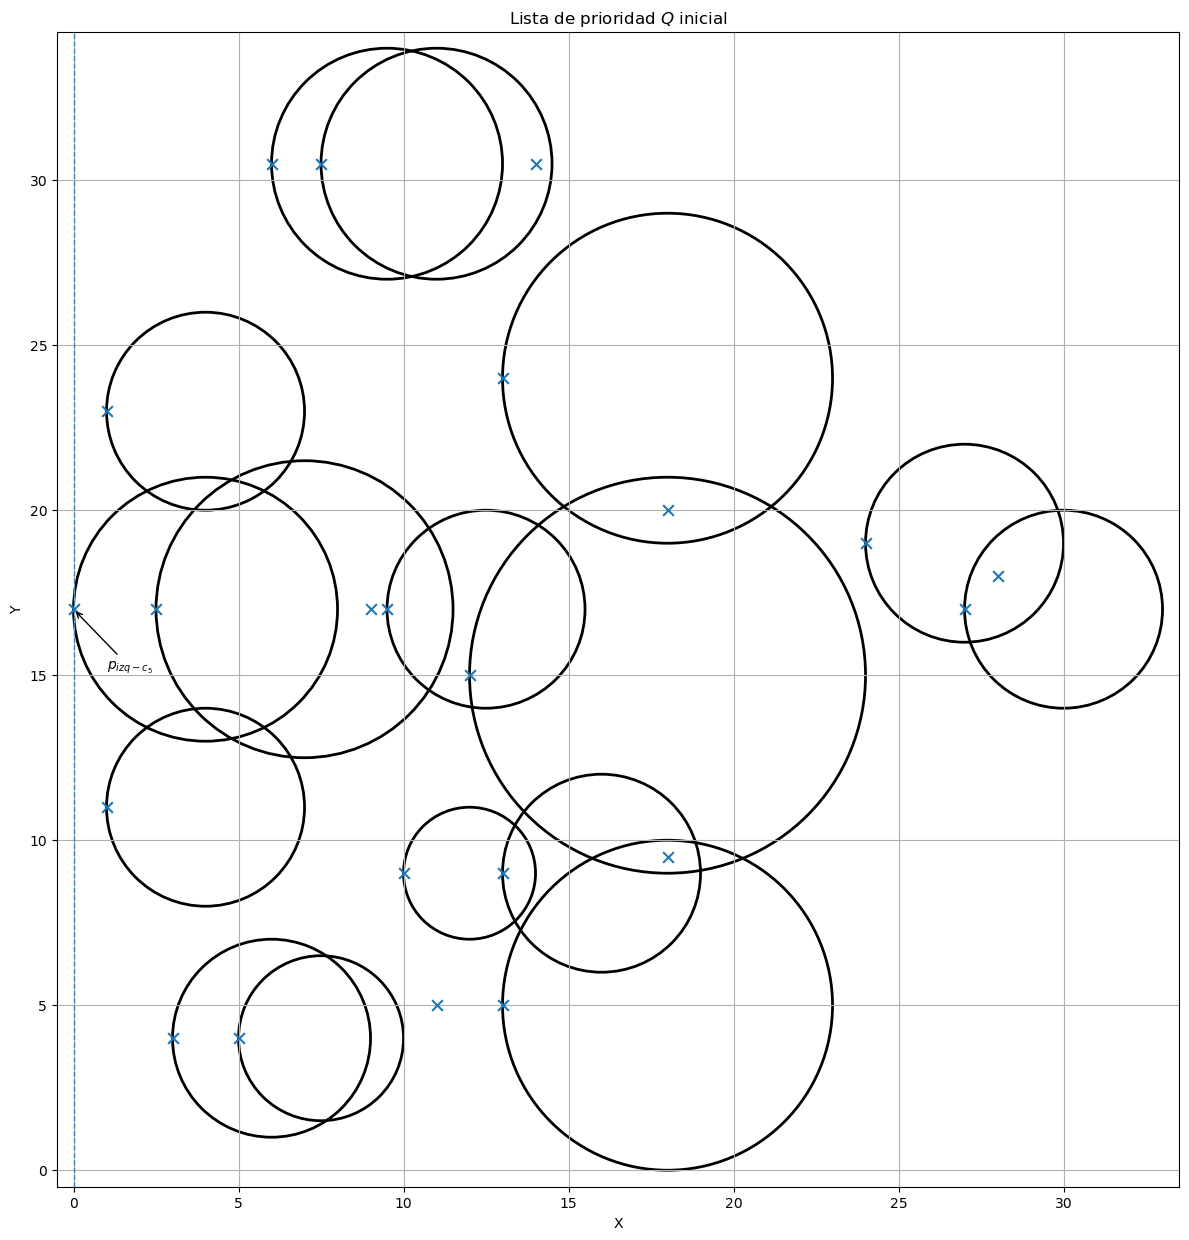

(<Figure size 1500x1500 with 1 Axes>,
 <Axes: title={'center': 'Lista de prioridad $Q$ inicial'}, xlabel='X', ylabel='Y'>)

In [29]:
# circles = [
#     ((7.5, 4), 2.5),
#     ((6, 4),  3),
#     ((4, 11), 3),
#     ((4, 17), 4),
#     ((4, 23), 3),
#     ((7, 17), 4.5),
#     ((9.5, 30.5), 3.5),
#     ((11, 30.5), 3.5),
#     ((18, 5), 5),
#     ((18, 15), 6),
#     ((18, 24), 5),
#     ((12, 9), 2),
#     ((12.5,17), 3),
#     ((16,9),3),
#     ((27,19),3),
#     ((30,17),3)
# ]

points = [
    (28, 18),           # p4
    (9, 17),            # p2
    (18, 9.5),          # p5
    (18, 20),           # p3
    (11, 5),            # p6
    (14, 30.5),         # p1
    (7.5-2.5, 4),       # p c15
    (6-3, 4),           # p c14
    (4-3, 11),          # p c11
    (4-4, 17),          # p c5
    (4-3, 23),          # p c4
    (7-4.5, 17),        # p c6
    (9.5-3.5, 30.5),    # p c1
    (11-3.5, 30.5),     # p c2
    (18-5, 5),          # p c16
    (18-6, 15),         # p c8
    (18-5, 24),         # p c3
    (12-2, 9),          # p c12
    (12.5-3,17),        # p c7
    (16-3,9),           # p c13
    (27-3,19),          # p c9
    (30-3,17),          # p c10
]

annotations = [
    # {"anchor": "circle", "index": 9, "text": "Main cluster"},            # at circle center
    # {"anchor": "point",  "index": 1, "text": "Depot", "pos": (8.2, 17.8)},# offset with arrow
    # {"anchor": "xy", "xy": (6.5, 33), "text": "$c_1$"},             # arbitrary location
    # {"anchor": "xy", "xy": (14, 33), "text": "$c_2$"},             # arbitrary location
    # {"anchor": "xy", "xy": (18, 29.5), "text": "$c_3$"},             # arbitrary location
    # {"anchor": "xy", "xy": (4, 26.5), "text": "$c_4$"},             # arbitrary location
    # {"anchor": "xy", "xy": (0.3, 19.5), "text": "$c_5$"},             # arbitrary location
    # {"anchor": "xy", "xy": (8, 21.7), "text": "$c_6$"},             # arbitrary location
    # {"anchor": "xy", "xy": (12.5, 20.5), "text": "$c_7$"},             # arbitrary location
    # {"anchor": "xy", "xy": (23, 19), "text": "$c_8$"},             # arbitrary location
    # {"anchor": "xy", "xy": (27, 22.5), "text": "$c_9$"},             # arbitrary location
    # {"anchor": "xy", "xy": (27.3, 15), "text": "$c_{10}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (0.5, 11), "text": "$c_{11}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (12, 11.5), "text": "$c_{12}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (16, 12.5), "text": "$c_{13}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (3, 6), "text": "$c_{14}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (9.5, 6), "text": "$c_{15}$"},             # arbitrary location
    # {"anchor": "xy", "xy": (23, 7), "text": "$c_{16}$"},             # arbitrary location

    # {"anchor": "point",  "index": 1, "text": "$p_2$", "pos": (9.5, 22)},# offset with arrow
    # {"anchor": "point",  "index": 2, "text": "$p_5$", "pos": (24, 8)},# offset with arrow
    # {"anchor": "point",  "index": 3, "text": "$p_3$", "pos": (23, 21)},# offset with arrow
    # {"anchor": "point",  "index": 4, "text": "$p_6$", "pos": (11, 3)},# offset with arrow
    # {"anchor": "point",  "index": 5, "text": "$p_1$", "pos": (15, 31)},# offset with arrow
    # {"anchor": "point",  "index": 0, "text": "$p_4$", "pos": (32, 21)},# offset with arrow
    # {"anchor": "point",  "index": 6, "text": "$p_{izq-c_{15}}$", "pos": (7, 0)},# offset with arrow
    # {"anchor": "point",  "index": 7, "text": "$p_{izq-c_{14}}$", "pos": (3, 0)},# offset with arrow
    # {"anchor": "point",  "index": 8, "text": "$p_{izq-c_{11}}$", "pos": (3, 10)},# offset with arrow
    {"anchor": "point",  "index": 9, "text": "$p_{izq-c_{5}}$", "pos": (1, 15)},# offset with arrow
    # {"anchor": "point",  "index": 10, "text": "$p_{izq-c_{4}}$", "pos": (3, 23)},# offset with arrow
    # {"anchor": "point",  "index": 11, "text": "$p_{izq-c_{6}}$", "pos": (5, 15)},# offset with arrow
    # {"anchor": "point",  "index": 12, "text": "$p_{izq-c_{1}}$", "pos": (3, 32)},# offset with arrow
    # {"anchor": "point",  "index": 13, "text": "$p_{izq-c_{2}}$", "pos": (10, 32)},# offset with arrow
    # {"anchor": "point",  "index": 14, "text": "$p_{izq-c_{16}}$", "pos": (11, 1)},# offset with arrow
    # {"anchor": "point",  "index": 15, "text": "$p_{izq-c_{8}}$", "pos": (11, 12)},# offset with arrow
    # {"anchor": "point",  "index": 16, "text": "$p_{izq-c_{3}}$", "pos": (11, 25)},# offset with arrow
    # {"anchor": "point",  "index": 17, "text": "$p_{izq-c_{12}}$", "pos": (8, 8)},# offset with arrow
    # {"anchor": "point",  "index": 18, "text": "$p_{izq-c_{7}}$", "pos": (11, 21)},# offset with arrow.
    # {"anchor": "point",  "index": 19, "text": "$p_{izq-c_{13}}$", "pos": (11, 8)},# offset with arrow
    # {"anchor": "point",  "index": 20, "text": "$p_{izq-c_{9}}$", "pos": (25, 18)},# offset with arrow
    # {"anchor": "point",  "index": 21, "text": "$p_{izq-c_{10}}$", "pos": (25, 15)},# offset with arrow
    
    # {"anchor": "circle", "index": 3, "text": "North hub","pos": (3.6, 18.6), "arrow": True, "style": {"fontsize": 9}}
]


plot_circles_points(
    circles=circles,
    points=points,
    annotations=annotations,
    show_vline=True,   # optional vertical line
    vline_x=0,
    title="Lista de prioridad $Q$ inicial",
    marker = "x"
)

In [8]:
import heapq
# import math

def make_events(circles, points):
    events = []
    for (cx, cy), r in circles:
        # left endpoint
        events.append((cx - r, cy, "left", ((cx, cy), r)))
        # right endpoint
        events.append((cx + r, cy, "right", ((cx, cy), r)))
    for (x, y) in points:
        events.append((x, y, "input", (x, y)))
    heapq.heapify(events)
    return events

def point_in_circle(x, y, circle):
    (cx, cy), r = circle
    return (x - cx) ** 2 + (y - cy) ** 2 <= r ** 2 + 1e-9

def sweep(circles, points):
    events = make_events(circles, points)
    active = set()
    Cr = set(circles)  # candidates
    removed = []

    while events:
        x, y, etype, data = heapq.heappop(events)
        if etype == "left":
            circle = data
            active.add(circle)
            print(f"LEFT at ({x:.2f},{y:.2f}), add {circle}")
        elif etype == "right":
            circle = data
            if circle in active:
                active.remove(circle)
            print(f"RIGHT at ({x:.2f},{y:.2f}), remove {circle}")
        elif etype == "input":
            px, py = data
            to_remove = [c for c in list(active) if point_in_circle(px, py, c)]
            print(f"INPUT at ({px:.2f},{py:.2f}), inside {to_remove}")
            for c in to_remove:
                if c in Cr:
                    Cr.remove(c)
                    removed.append(c)
        elif etype == "intersect":
            print("intersect")
            pass
    return Cr, removed


# Example usage
circles = [
    ((3.5, 11.5), 1.5),
    ((6.5, 8.5),  1.5),
    ((5.0, 10.0), 1.0),
]
points = [(4.3, 10.5), (7.5, 4.5)]

remaining, removed = sweep(circles, points)
print("\nRemaining empty circles:", remaining)
print("Pruned (non-empty) circles:", removed)


LEFT at (2.00,11.50), add ((3.5, 11.5), 1.5)
LEFT at (4.00,10.00), add ((5.0, 10.0), 1.0)
INPUT at (4.30,10.50), inside [((5.0, 10.0), 1.0), ((3.5, 11.5), 1.5)]
LEFT at (5.00,8.50), add ((6.5, 8.5), 1.5)
RIGHT at (5.00,11.50), remove ((3.5, 11.5), 1.5)
RIGHT at (6.00,10.00), remove ((5.0, 10.0), 1.0)
INPUT at (7.50,4.50), inside []
RIGHT at (8.00,8.50), remove ((6.5, 8.5), 1.5)

Remaining empty circles: {((6.5, 8.5), 1.5)}
Pruned (non-empty) circles: [((5.0, 10.0), 1.0), ((3.5, 11.5), 1.5)]


In [9]:
# --- Data ---
circles = [
    ((7.5, 4), 2.5),
    ((6, 4),  3),
    ((4, 11), 3),
    ((4, 17), 4),
    ((4, 23), 3),
    ((7, 17), 4.5),
    ((9.5, 30.5), 3.5),
    ((11, 30.5), 3.5),
    ((18, 5), 5),
    ((18, 15), 6),
    ((18, 24), 5),
    ((12, 9), 2),
    ((12.5,17), 3),
    ((16,9),3),
    ((27,19),3),
    ((30,17),3)
]

points = [
    (28, 18), 
    (9, 17), 
    (18, 9.5), 
    (18, 20), 
    (11, 5), 
    (14, 30.5)
]


In [10]:
remaining, removed = sweep(circles, points)
print("\nRemaining empty circles:", remaining)
print("Pruned (non-empty) circles:", removed)

LEFT at (0.00,17.00), add ((4, 17), 4)
LEFT at (1.00,11.00), add ((4, 11), 3)
LEFT at (1.00,23.00), add ((4, 23), 3)
LEFT at (2.50,17.00), add ((7, 17), 4.5)
LEFT at (3.00,4.00), add ((6, 4), 3)
LEFT at (5.00,4.00), add ((7.5, 4), 2.5)
LEFT at (6.00,30.50), add ((9.5, 30.5), 3.5)
RIGHT at (7.00,11.00), remove ((4, 11), 3)
RIGHT at (7.00,23.00), remove ((4, 23), 3)
LEFT at (7.50,30.50), add ((11, 30.5), 3.5)
RIGHT at (8.00,17.00), remove ((4, 17), 4)
RIGHT at (9.00,4.00), remove ((6, 4), 3)
INPUT at (9.00,17.00), inside [((7, 17), 4.5)]
LEFT at (9.50,17.00), add ((12.5, 17), 3)
RIGHT at (10.00,4.00), remove ((7.5, 4), 2.5)
LEFT at (10.00,9.00), add ((12, 9), 2)
INPUT at (11.00,5.00), inside []
RIGHT at (11.50,17.00), remove ((7, 17), 4.5)
LEFT at (12.00,15.00), add ((18, 15), 6)
LEFT at (13.00,5.00), add ((18, 5), 5)
LEFT at (13.00,9.00), add ((16, 9), 3)
LEFT at (13.00,24.00), add ((18, 24), 5)
RIGHT at (13.00,30.50), remove ((9.5, 30.5), 3.5)
RIGHT at (14.00,9.00), remove ((12, 9), 2)